## Аналитика в авиакомпании 📃
 
#### У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.
#### /datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
 
#### /datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

#### Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;



### Оглавление:  
1. [Загрузка и изучение файлов с данными](#step1)
2. [Топ 10 городов количеству рейсов](#step2)
3. [Графики](#step3)
4. [Общий вывод](#step4)



### Загрузка и изучение файлов с данными <a id="step1"></a>

In [1]:
#Подгружаем библиотеки 
import pandas as pd
import seaborn as sns
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Подгружаем первый файл с данными
query_1=pd.read_csv('/datasets/query_1.csv')

In [3]:
#Посмотрим информацию о датасете
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
#Полностью выведем таблицу
display(query_1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [6]:
query_1.duplicated().sum()

0

In [7]:
#Подгружаем второй файл с данными
query_3=pd.read_csv('/datasets/query_3.csv')

In [8]:
#Посмотрим информацию о датасете
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
query_3.average_flights=query_3.average_flights.astype('float16')

In [10]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float16
dtypes: float16(1), object(1)
memory usage: 1.1+ KB


In [11]:
#Выведем первые 10 строк таблицы
display(query_3.head(10))

,city,average_flights
0,Абакан,3.871094
1,Анадырь,1.000000
2,Анапа,2.162109
3,Архангельск,5.355469
4,Астрахань,2.451172
5,Барнаул,2.613281
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [12]:
query_3.describe()

,average_flights
count,101.000000
mean,5.496094
std,13.117188
min,1.000000
25%,2.000000
50%,3.000000
75%,5.871094
max,129.750000


In [13]:
query_3.duplicated().sum()

0

#### Вывод: Данные корректны, пропусков не обнаружено.

###  Топ-10 городов по количеству рейсов <a id="step2"></a>

In [14]:
#Посмотрим топ-10 городов по количеству вылетов в среднем.
display(query_3.sort_values(by='average_flights' , ascending=False).head(10))

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.195312
63,Пермь,10.132812
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


### ГРАФИКИ <a id="step3"></a>

#### Модели самолетов и количество рейсов

In [15]:
#Сделаем сводную таблицу по моделям
models=query_1.pivot_table(index='model', values='flights_amount')

In [16]:
#Отсортируем по убыванию
models=models.sort_values(by='flights_amount')

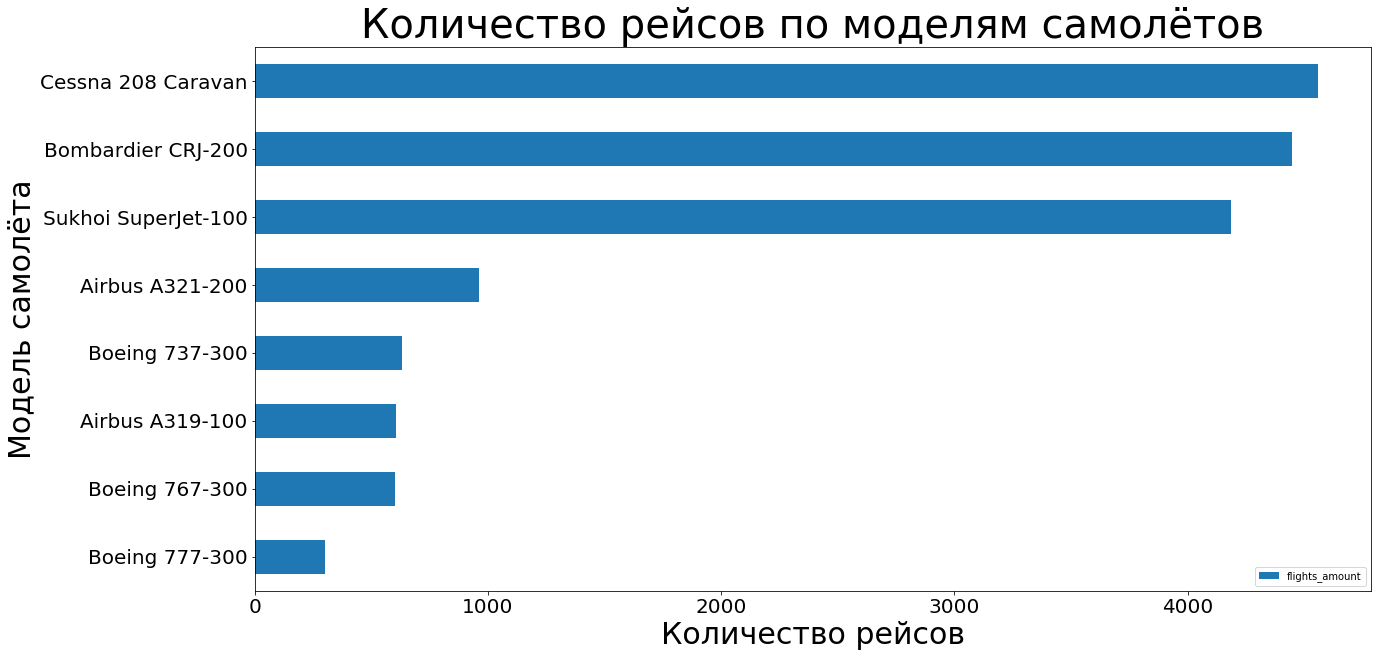

In [17]:
#Построим график
rcParams['figure.figsize'] = 20, 10
models.plot(y='flights_amount', kind='barh')
plt.xlabel('Количество рейсов', size=30)
plt.ylabel('Модель самолёта', size=30)
plt.title('Количество рейсов по моделям самолётов', size=40)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show();


* Больше всего рейсов выполняется на 3-х моделях самолётов: **Cessna 208 Caravan,	Bombardier CRJ-200 и Sukhoi SuperJet-100.**
* При этом **Cessna 208 Caravan** это сравнительно маленький самолёт (до 10 человек)

#### Города и количество рейсов

In [18]:
#Сделаем сводную таблицу по городам
cities=query_3.pivot_table(index='city', values='average_flights')

In [19]:
#Отсортируем по убыванию
cities=cities.sort_values(by='average_flights')

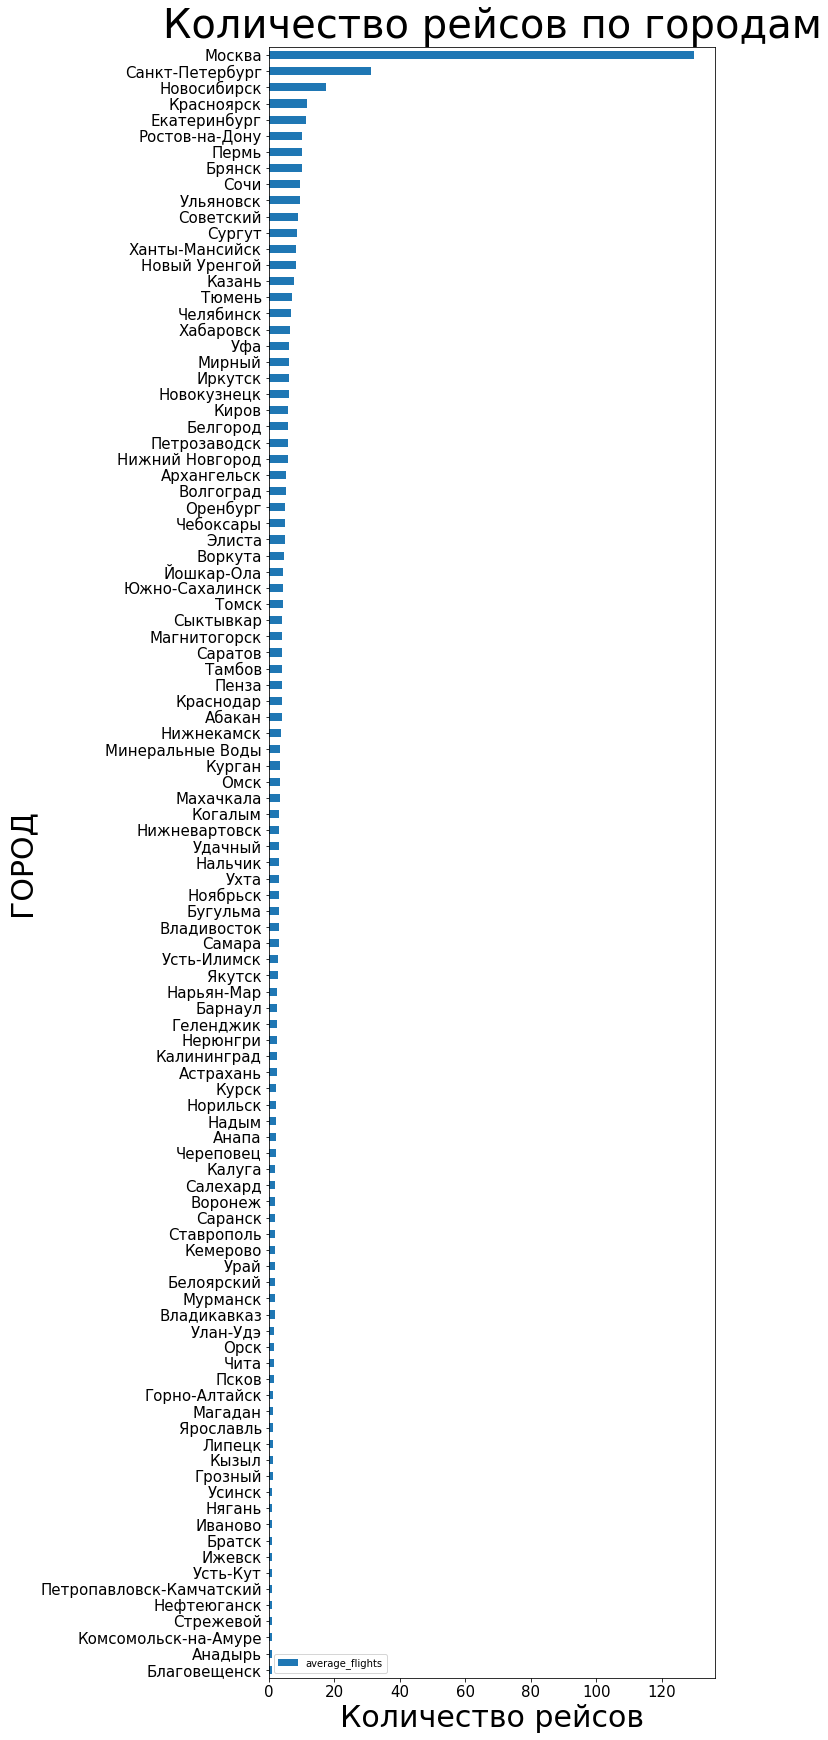

In [20]:
#Построим график
rcParams['figure.figsize'] = 8, 30
cities.plot(y='average_flights', kind='barh')
plt.xlabel('Количество рейсов', size=30)
plt.ylabel('ГОРОД', size=30)
plt.title('Количество рейсов по городам', size=40)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show();

#### ТОП 10 городов по количеству рейсов

In [21]:
#Сделаем срез по топ-10 городам
variable=9.580645
cities_top10=query_3.query('average_flights >= @variable')

In [22]:
#Поместим его в сводную с городами в качестве индексов
top10=cities_top10.pivot_table(index='city', values='average_flights')

In [23]:
#Отсортируем по убыванию
top10=top10.sort_values(by='average_flights')

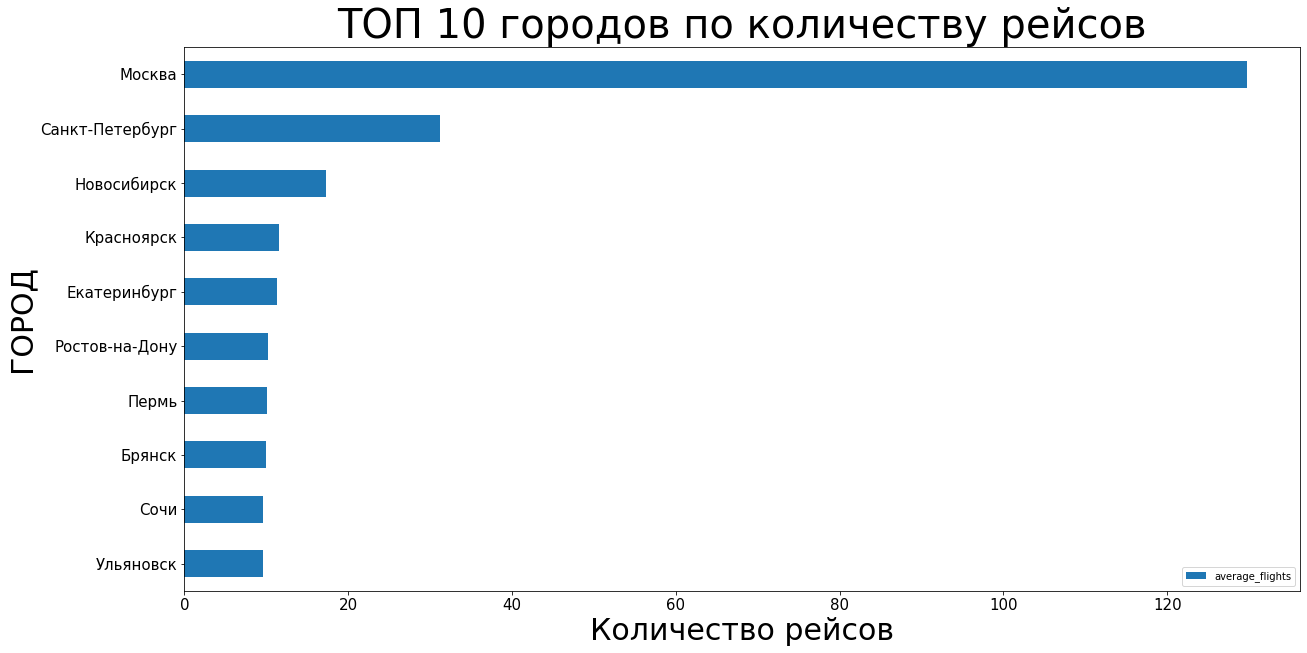

In [24]:
#Выведем график
rcParams['figure.figsize'] = 20, 10
top10.plot(y='average_flights', kind='barh')
plt.xlabel('Количество рейсов', size=30)
plt.ylabel('ГОРОД', size=30)
plt.title('ТОП 10 городов по количеству рейсов', size=40)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show();

## ВЫВОД: <a id="step4"></a>

* ТОП 10 городов по кол-ву вылетов:	**Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.**
#### Почему в топ 10 городов по вылету нашей авиакомпании попали города с населением менее полумиллиона, а многие города миллионники не попали? 
### Топ 10 городов РФ по кол-ву населения
1. г. Москва, население **12 615 882** человек
2. г. Санкт-Петербург, население **5 383 890** человек	
3. г. Новосибирск, население **1 618 039**	человек
4. г. Екатеринбург, население **1 483 119** человек
5. **г. Нижний Новгород**, население **1 253 511** человек
6. **г. Казань**, население	**1 251 969** человек
7. **г. Челябинск**, население **1 200 719** человек
8. **г. Омск**, население **1 164 815** человек
9. **г. Самара**, население **1 156 608** человек
10. г. Ростов-на-Дону, население **1 133 307** человек

### Для дальнейшего исследования можно выделить Омск или Самару и сравнить направление с Брянском и проанализировать и ответить на вопросы:
* Нужно ли развивать присутствие авиакомпании в других городах-милионниках?
* Почему среднее количество рейсов нашей авиакомпании в Самаре отличается от Брянска?
* Средний уровень ЗП в Самаре и Брянске различается?
* Сколько авиакомпаний представлено в Самаре и Брянске?
* По каким направлениям осуществляются вылеты из этих городов?
* На сколько различается стоимость билета до МСК из этих городов?
* Хватит ли авиапарка для увеличения присутствия?






* Больше всего рейсов выполняется на 3-х моделях самолётов: **Cessna 208 Caravan,	Bombardier CRJ-200 и Sukhoi SuperJet-100.**
* При этом **Cessna 208 Caravan** это небольшой самолёт. 